In [1]:
import json

import ml_helper
import ml_plots

In [2]:
COLORS = {
    'red': '#B56576',
    'blue': '#187795',
    'green': '#3F9A73' , #'#47B887', #'#38686A',
    'brown': '#DBCFB0',
    'yellow': '#D5C67A'
}

In [3]:
# load latest data if keyword is in the file name
hist_file_name = ml_helper.get_newest_file('histories/', name='Transformer_history', extension=".json", ensemble=False)
print(f"Loading {hist_file_name}")

Loading histories/Transformer_history_2025-02-16_18-55-46.json


In [4]:
hist = None
with open(hist_file_name, 'r') as file:
    hist = json.load(file)

print(f"Keys: {hist.keys()}")

Keys: dict_keys(['train_loss', 'val_loss', 'train_rmse', 'val_rmse', 'val_labels', 'val_preds', 'test_labels', 'test_preds'])


In [5]:
labels = hist['test_labels']
preds= hist['test_preds']

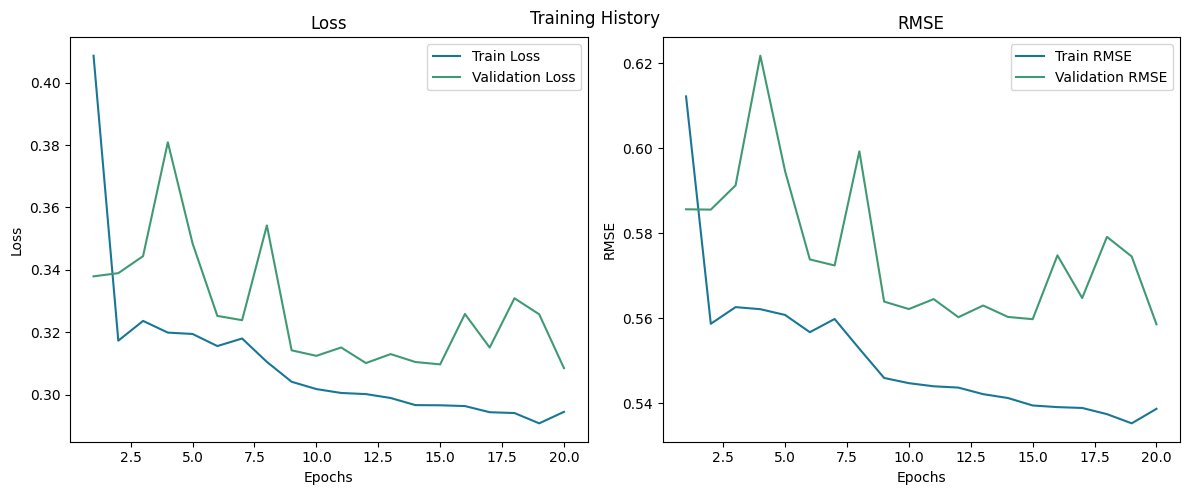

In [6]:
# plot the training history
ml_plots.plot_training_history(hist, colors=COLORS).show()

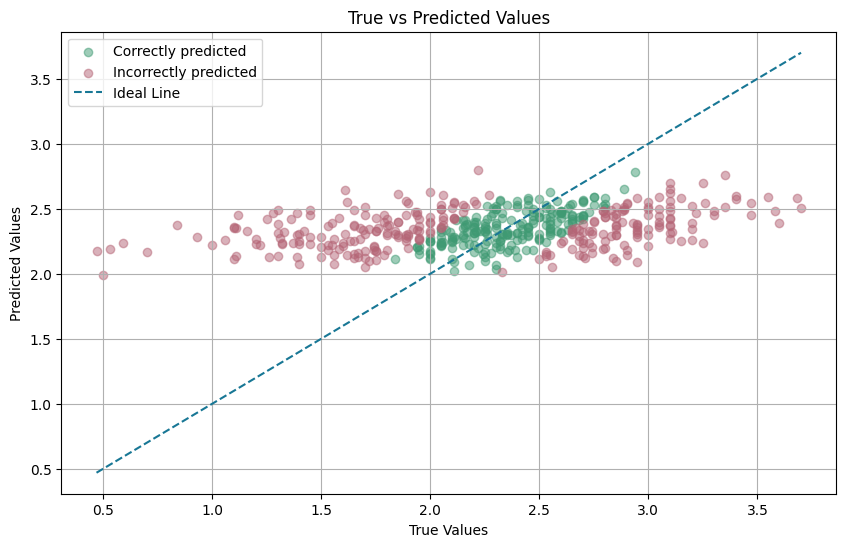

In [7]:
ml_plots.plot_predictions(labels, preds, colors=COLORS).show()

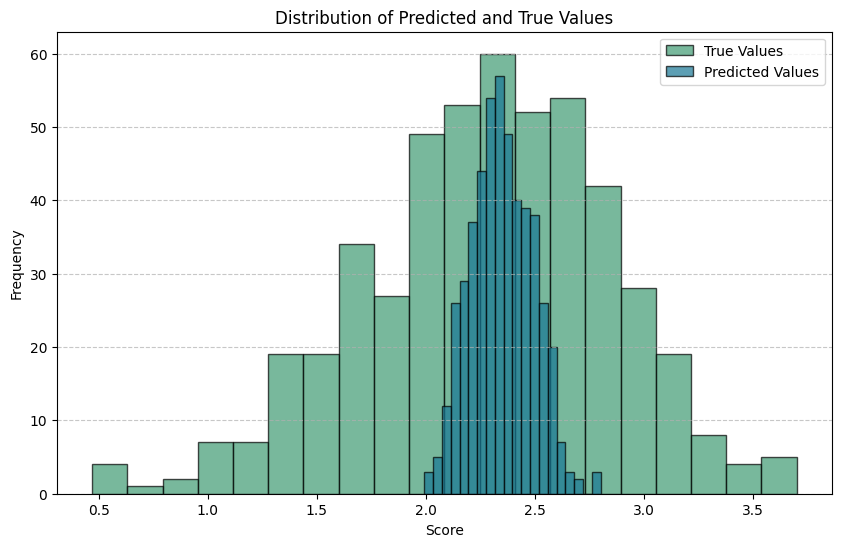

In [8]:
ml_plots.plot_distribution(labels, preds, colors=COLORS).show()


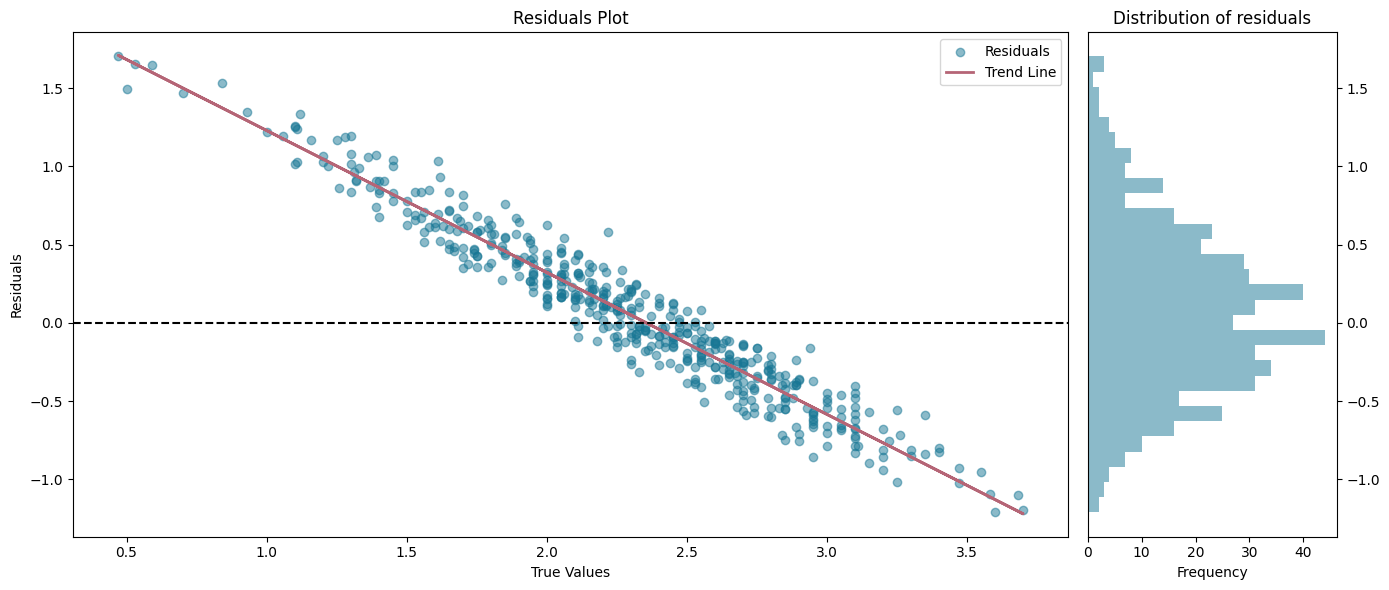

In [9]:
# Plot residuals with trend line
ml_plots.plot_residuals(labels, preds, colors=COLORS).show()

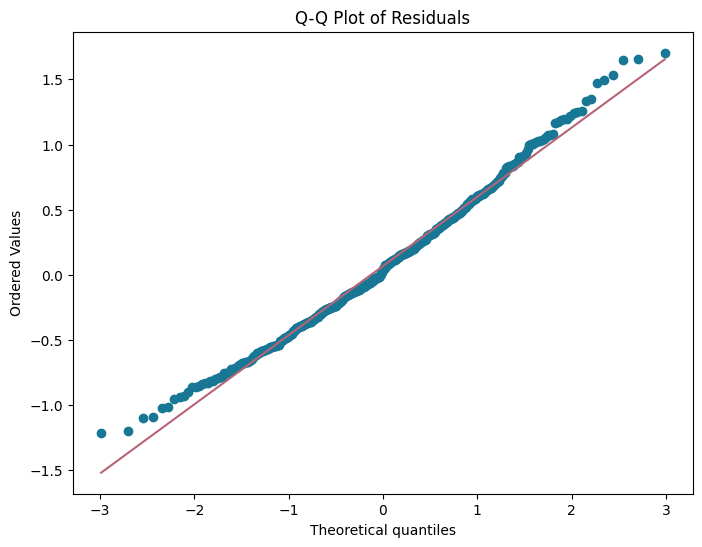

In [10]:
# Quantile-Quantile Plot
ml_plots.plot_qq(labels, preds, COLORS).show()

In [11]:
epochs = 10
# Reaorder hist['val_preds'] from [{epoch:int: [val_preds]}, ...] to {epoch:int: [val_preds], ...}
val_preds = {}
for i, val_pred in enumerate(hist['val_preds'][:epochs]):
    val_preds[i] = hist['val_preds'][i].values()

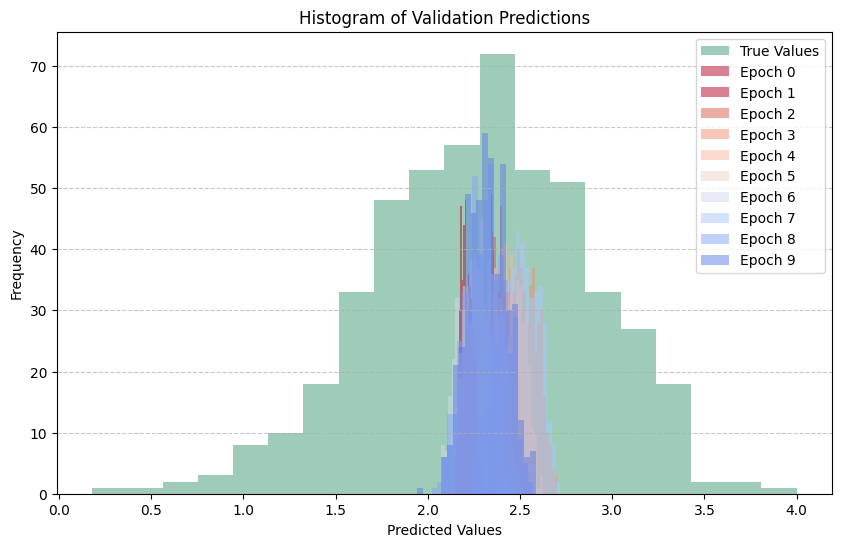

In [12]:
ml_plots.plot_val_preds(val_preds, hist['val_labels'], COLORS).show()